# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

import re
import string
from string import digits

# Loading the data

In [2]:
df = pd.read_csv('Hindi_English_Truncated_Corpus.csv', encoding='utf-8')
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


# Preprocess the data

In [3]:
# count the specific values in source column
df['source'].value_counts()

tides        50000
ted          39881
indic2012    37726
Name: source, dtype: int64

In [4]:
# filter data by keeing only rows with red source
df = df[df['source'] == 'ted']
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
7,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
13,ted,So there is some sort of justice,तो वहाँ न्याय है


In [5]:
# resetting index after filtering the data
df.reset_index(inplace=True, drop=True)
df.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
3,ted,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
4,ted,So there is some sort of justice,तो वहाँ न्याय है


In [6]:
# taking only required columns
required_columns = ['english_sentence', 'hindi_sentence']
df = df[required_columns]

In [7]:
df.head()

,english_sentence,hindi_sentence
0,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
3,"And who are we to say, even, that they are wrong",और हम होते कौन हैं यह कहने भी वाले कि वे गलत हैं
4,So there is some sort of justice,तो वहाँ न्याय है


In [8]:
# checking for the null values
df.isnull().sum()

english_sentence    0
hindi_sentence      0
dtype: int64

In [9]:
# checking for the duplicate values
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
39876    False
39877    False
39878     True
39879    False
39880    False
Length: 39881, dtype: bool

In [10]:
# checking the shape of the dataframe
df.shape

(39881, 2)

In [11]:
# remove the duplicates
df.drop_duplicates(inplace=True)

In [12]:
# checking the shape of dataframes after removing the duplicates
df.shape

(38803, 2)

In [13]:
# getting names of the columns present
df.columns

Index(['english_sentence', 'hindi_sentence'], dtype='object')

In [14]:
# lower case all the characters
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.lower())
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.lower())

In [15]:
# remove quotes
df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub("'", '', x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("'", '', x))

df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub("“", '', x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("“", '', x))

In [16]:
# set of punctuations
exclude = set(string.punctuation)

# remove all the special characters
df['english_sentence'] = df['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [17]:
# trans of all the numbers
remove_digits = str.maketrans('', '', digits)

# remove all the digits
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.translate(remove_digits))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.translate(remove_digits))

# remove hindi digits
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

In [18]:
# remove extra spaces
df['english_sentence'] = df['english_sentence'].apply(lambda x: x.strip())
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: x.strip())

df['english_sentence'] = df['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [19]:
# add START and END token to the target string
df['hindi_sentence'] = df['hindi_sentence'].apply(lambda x: 'START_ ' + x + ' _END')

In [20]:
df.head()

,english_sentence,hindi_sentence
0,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...
1,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...
2,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...
3,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...
4,so there is some sort of justice,START_ तो वहाँ न्याय है _END


In [21]:
# function to get the vocabulary of the words
def get_vocab(df, col):
    vocab = set()
    for sent in df[col]:
        for word in sent.split():
            if word not in vocab:
                vocab.add(word)
    return vocab

In [22]:
# get the vocabulary of the english word
all_eng_words = get_vocab(df, 'english_sentence')
all_hindi_words = get_vocab(df, 'hindi_sentence')

In [23]:
len(all_eng_words), len(all_hindi_words)

(17007, 21945)

In [24]:
# length of the sentences
df['length_eng_sentence'] = df['english_sentence'].apply(lambda x: len(x.split()))
df['length_hin_sentence'] = df['hindi_sentence'].apply(lambda x: len(x.split()))

In [25]:
df.head()

,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
0,politicians do not have permission to do what ...,START_ राजनीतिज्ञों के पास जो कार्य करना चाहिए...,12,15
1,id like to tell you about one such child,START_ मई आपको ऐसे ही एक बच्चे के बारे में बता...,9,13
2,what we really mean is that theyre bad at not ...,START_ हम ये नहीं कहना चाहते कि वो ध्यान नहीं ...,12,13
3,and who are we to say even that they are wrong,START_ और हम होते कौन हैं यह कहने भी वाले कि व...,11,15
4,so there is some sort of justice,START_ तो वहाँ न्याय है _END,7,6


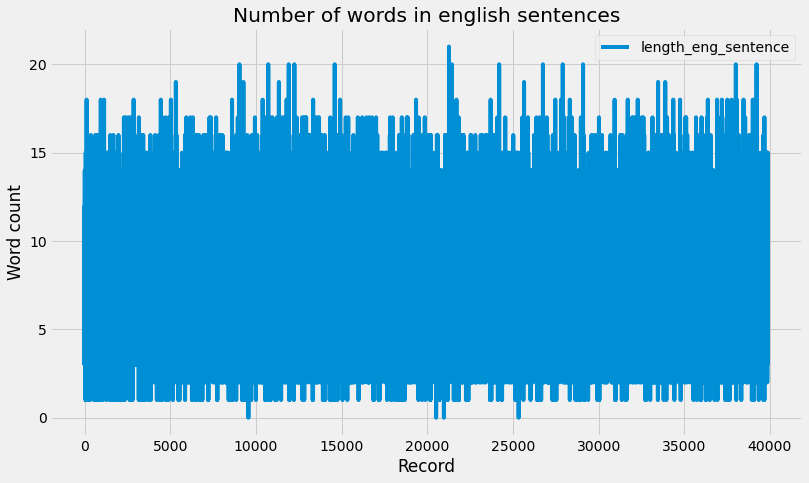

In [26]:
# plot for the number of words in the english sentence
plt.figure(figsize=(12, 7))
df['length_eng_sentence'].plot()
plt.title('Number of words in english sentences')
plt.xlabel('Record')
plt.ylabel('Word count')
plt.legend()
plt.show()

In [27]:
# removing all the records whose length is 0 or greater then 20
df = df[df['length_eng_sentence'] <= 20]
df = df[df['length_eng_sentence'] > 0]

In [28]:
df.shape

(38798, 4)

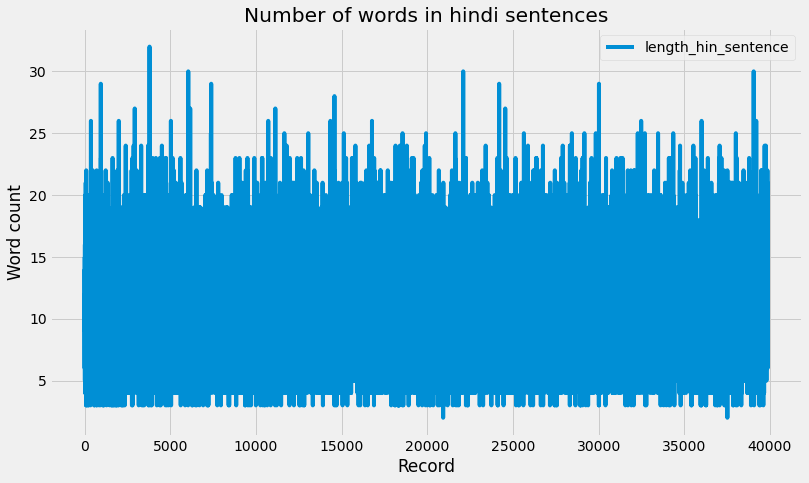

In [29]:
# plot for the number of words in the hindi sentence
plt.figure(figsize=(12, 7))
df['length_hin_sentence'].plot()
plt.title('Number of words in hindi sentences')
plt.xlabel('Record')
plt.ylabel('Word count')
plt.legend()
plt.show()

In [30]:
# removing all the records whose length is 0 or greater then 20
df = df[df['length_hin_sentence'] <= 20]
df = df[df['length_hin_sentence'] > 0]

In [31]:
df.shape

(38472, 4)

In [32]:
max_length_src = df['length_eng_sentence'].max()
max_length_tar = df['length_hin_sentence'].max()

print("Maximum length of english sentence:", max_length_src)
print("Maximum length of hindi sentence:", max_length_tar)

Maximum length of english sentence: 20
Maximum length of hindi sentence: 20


In [33]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))

num_encoder_token = len(all_eng_words)
num_decoder_token = len(all_hindi_words)

num_encoder_token, num_decoder_token

(17007, 21945)

In [34]:
# adding zero padding in decoder
num_decoder_token += 1

In [35]:
# creating dictionary of index for input and target words
input_token_index = dict((word, i+1) for i, word in enumerate(input_words))
target_token_index = dict((word, i+1) for i, word in enumerate(target_words))

In [36]:
# creating dictionary of index for input and target words in reverse format
reverse_input_token_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_token_index = dict((i, word) for word, i in enumerate(target_words))

In [37]:
df = shuffle(df)
df.head()

,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
29794,you can read the structure and the ideology of...,START_ आप एक देश के ढाँचे और सिद्धांत को पढ सक...,11,13
29879,i cant help it i live here,START_ क्योंकि मैं यहाँ रहती हूँ _END,7,7
38874,its a way of looking for natural explanations ...,START_ यह सभी घटनाएं के लिए प्राकृतिक स्पष्टीक...,11,14
414,that bottom thing which says theres no effect ...,START_ सबसे नीचे जो दिखाता है कि वहाँ कोई प्रभ...,10,13
26955,but benefits for the first time in ages,START_ बल्कि और भी फायदे जो पहली बार हुआ था _END,8,11


# Split the data

In [38]:
X, y = df['english_sentence'], df['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((30777,), (7695,))

# Save the data

In [39]:
X_train.to_pickle('pickle_data/X_train.pkl')
y_train.to_pickle('pickle_data/y_train.pkl')

X_test.to_pickle('pickle_data/X_test.pkl')
y_test.to_pickle('pickle_data/y_test.pkl')

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

# Encoder decoder architecture